In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.transforms as transforms

In [2]:
# Note to self: CSV - failing dtype, wont plot or change to int using .astype(int)
df = pd.read_csv("./data/seklima/wyssen_det/130317_260317.csv")

In [3]:
df = df.drop(df.index[-1])

In [4]:
# Change symbols so table is in correct format for further analysis. Change all ',' to '.' for numbers etc.

df['air_temperature'] = (df['air_temperature'].replace('\.','', regex=True).replace(',','.', regex=True).astype(float))
df['max(wind_speed PT1H)'] = (df['max(wind_speed PT1H)'].replace('\.','', regex=True).replace(',','.', regex=True).astype(float))
df['max_wind_speed(wind_from_direction PT1H)'] = (df['max_wind_speed(wind_from_direction PT1H)'].replace('\.','', regex=True).replace(',','.', regex=True).astype(float))
df['sum(precipitation_amount PT1H)'] = (df['sum(precipitation_amount PT1H)'].replace('\.','', regex=True).replace(',','.', regex=True).astype(float))
df['time (Norwegian Mean time)'] = df['time (Norwegian Mean time)'].replace('.','-')

temp = df['air_temperature']
wind = df['max(wind_speed PT1H)']
wind_dir = df['max_wind_speed(wind_from_direction PT1H)']
precipitation = df['sum(precipitation_amount PT1H)']

In [5]:
# Format = %d-%m-%Y %H:%M:%S, lenght: 360, dtype: datetime64[ns]
time = df['time (Norwegian Mean time)']
time2 = pd.to_datetime(time, format='%d.%m.%Y %H:%M')

In [6]:
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()       # every day
hour = mdates.HourLocator()       # every hour
myFmt = mdates.DateFormatter('%d.%m.%Y')

In [22]:
# Input to plot

# Satellite passing date-time
# Satellite passings
x1 = datetime.datetime(2017,3,13,5,54,43)       # bc    S1B 110
x2 = datetime.datetime(2017,3,13,17,10,33)      # b     S1B 117 sat55 wys56, sat54 wys61, sat54 wys66, sat55 wys76, sat54 wys79, sat53 wys87
x3 = datetime.datetime(2017,3,14,5,47,5)        # b     S1A 37 sat49 wys55
x4 = datetime.datetime(2017,3,14,17,2,25)       # b     S1A 44  sat52 wys55, sat51 wys65

x5 = datetime.datetime(2017,3,15,15,0,0)        # r
x6 = datetime.datetime(2017,3,16,11,30,0)       # r
x7 = datetime.datetime(2017,3,18,8,30,0)        # r

x8 = datetime.datetime(2017,3,19,5,55,28)       # bc    S1A 110 
x9 = datetime.datetime(2017,3,20,5,46,27)      # b     S1B 37 sat49 wys55
x10 = datetime.datetime(2017,3,20,17,1,49)      # b     S1B 44 sat52 wys55, sat51 wys65

x11 = datetime.datetime(2017,3,25,5,54,44)      # bc    S1B 110
x12 = datetime.datetime(2017,3,25,9,0,0)        # r
x13 = datetime.datetime(2017,3,25,17,10,4)      # b     S1B 117 sat55 wys56, sat54 wys61, sat54 wys66, sat55 wys76, sat54 wys79, sat53 wys87

# Start- and end-date on x-axis
start = datetime.datetime(2017, 3, 13)
end = datetime.datetime(2017, 3, 26)

# Save file as
file = 'figures/test.png'

# Colors
b = 'blue'      # Blue lines: reference and activity image for passing satellite + relative orbit
bc = 'black'    # Black lines: passing satellite + relative orbit
r = 'red'       # Red lines: time of avalanche release

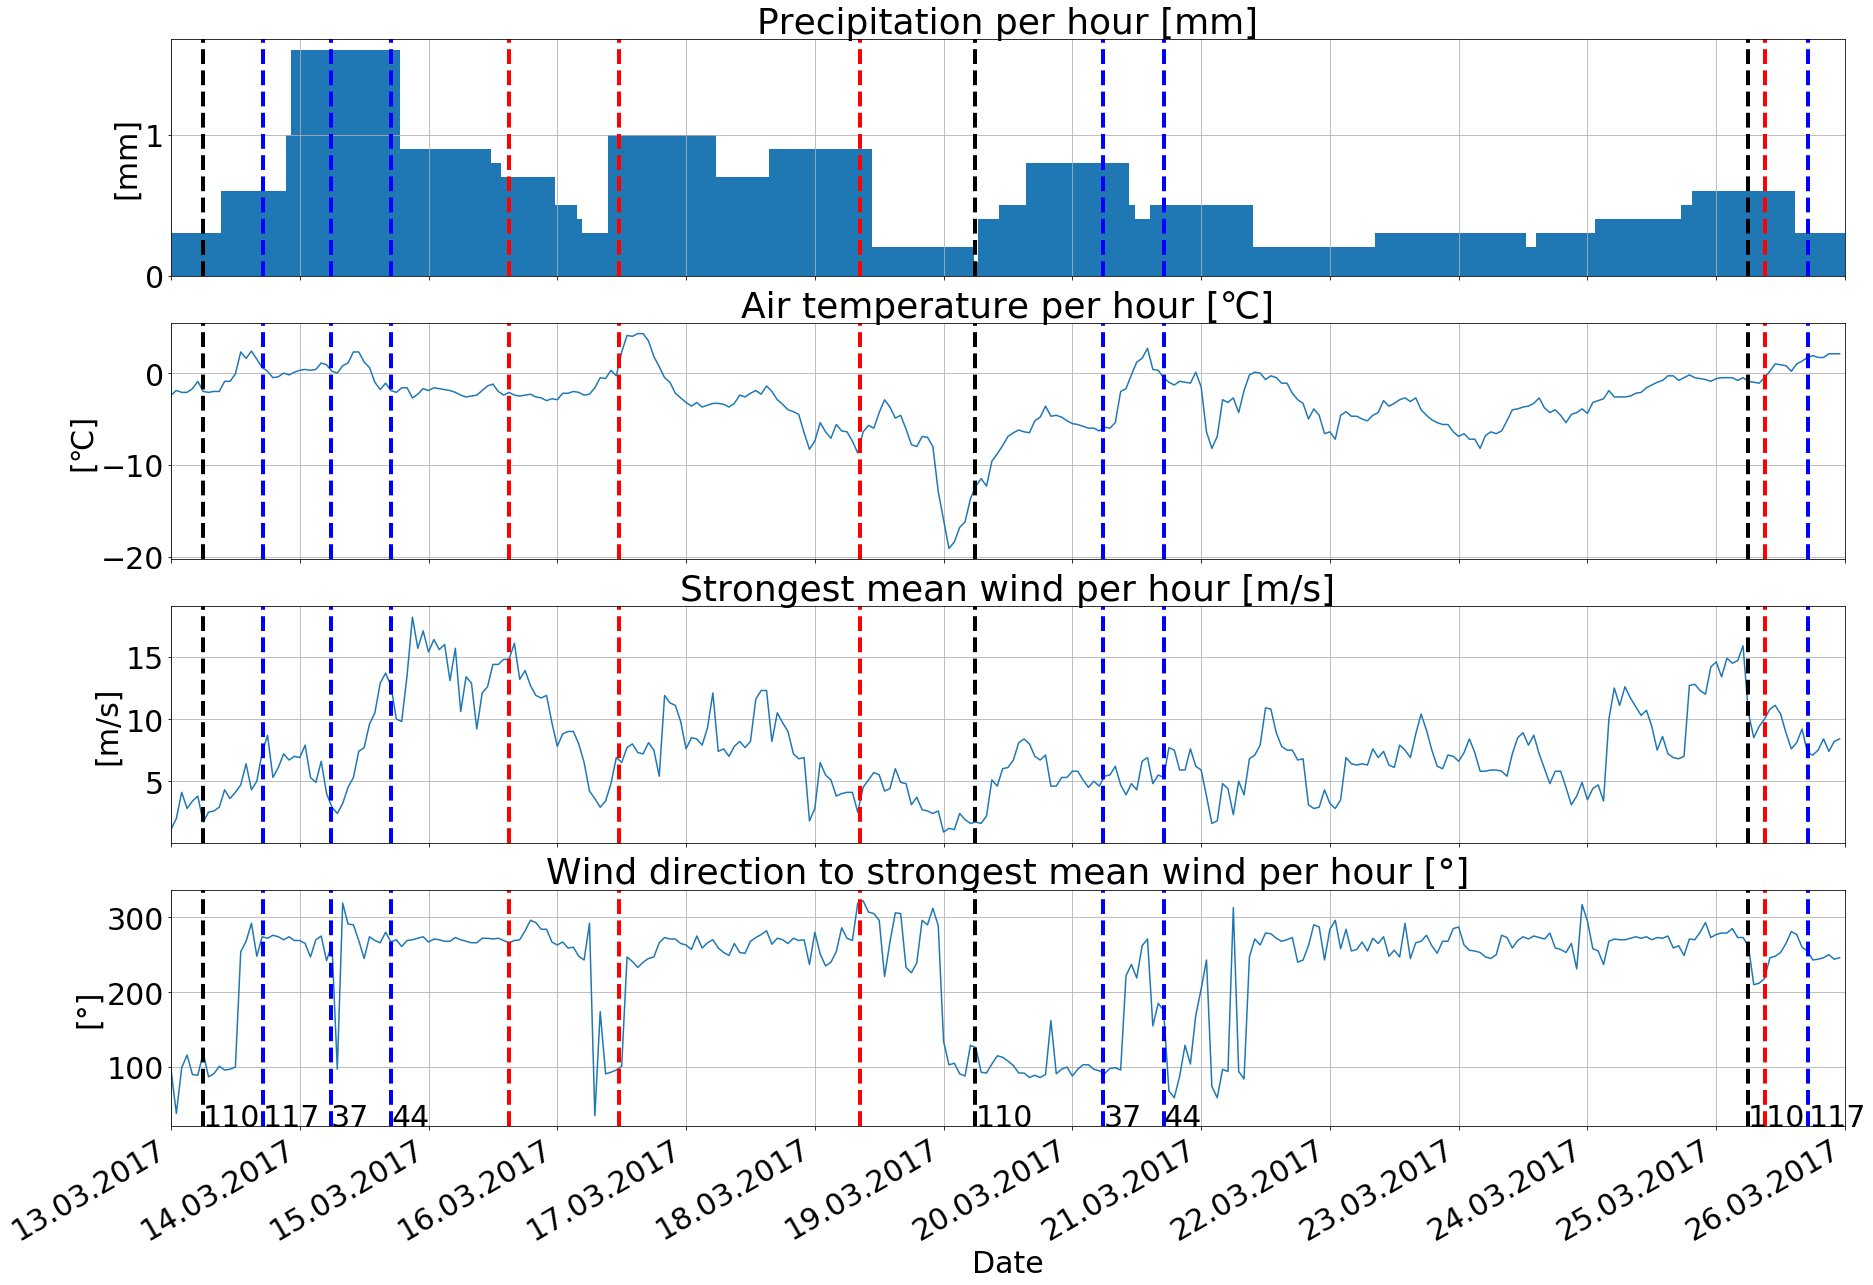

In [27]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(30,20), sharex=True)
#fig.subplots_adjust(hspace=0)
#fig.subtitle('subtitle')

# Y-axis with meteorological data
ax1.bar(time2, precipitation)
ax2.plot(time2, temp)
ax3.plot(time2, wind)
ax4.plot(time2, wind_dir)

# Formatting X-axis with small lines per day
ax1.xaxis.set_major_locator(days)
ax1.xaxis.set_major_formatter(myFmt)
#ax1.xaxis.set_minor_locator(hour)
plt.setp(ax4.get_xticklabels(), rotation=30, ha="right")

# Subplot labels
ax1.grid()
ax1.set_title('Precipitation per hour [mm]')
ax1.set_ylabel('[mm]')

ax2.grid()
ax2.set_title('Air temperature per hour [℃]')
ax2.set_ylabel('[℃]')

ax3.grid()
ax3.set_title('Strongest mean wind per hour [m/s]')
ax3.set_ylabel('[m/s]')

ax4.grid()
ax4.set_title('Wind direction to strongest mean wind per hour [°]')
ax4.set_ylabel('[°]')
ax4.set_xlabel('Date')

# Lines covering all fours plots at the same date-time.
for ax in [ax1, ax2, ax3, ax4]:
    ax.axvline(x=x1, c=bc, linestyle='--',linewidth=4)      # bc    S1B 110   
    ax.axvline(x=x2, c=b, linestyle='--',linewidth=4)       # b     S1B 117 sat55 wys56, sat54 wys61, sat54 wys66, sat55 wys76, sat54 wys79, sat53 wys87
    ax.axvline(x=x3, c=b,linestyle='--',linewidth=4)        # b     S1A 37 sat49 wys55
    ax.axvline(x=x4, c=b,linestyle='--',linewidth=4)        # b     S1A 44  sat52 wys55, sat51 wys65
    
    ax.axvline(x=x5, c=r,linestyle='--',linewidth=4)        # r
    ax.axvline(x=x6, c=r,linestyle='--',linewidth=4)        # r
    ax.axvline(x=x7, c=r,linestyle='--',linewidth=4)        # r
    
    ax.axvline(x=x8, c=bc,linestyle='--',linewidth=4)       # bc    S1A 110
    ax.axvline(x=x9, c=b,linestyle='--',linewidth=4)        # b     S1B 37 sat49 wys55
    ax.axvline(x=x10, c=b,linestyle='--',linewidth=4)       # b     S1B 44 sat52 wys55, sat51 wys65
    
    ax.axvline(x=x11, c=bc,linestyle='--',linewidth=4)      # bc    S1B 110
    ax.axvline(x=x12, c=r,linestyle='--',linewidth=4)       # r
    ax.axvline(x=x13, c=b,linestyle='--',linewidth=4)       # b     S1B 117 sat55 wys56, sat54 wys61, sat54 wys66, sat55 wys76, sat54 wys79, sat53 wys87
    trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)

# Labels to lines with relative orbit number
plt.text(x1, 0, '110', transform=trans) #110
plt.text(x2, 0, '117', transform=trans) #117
plt.text(x3, 0, '37', transform=trans) #37
plt.text(x4, 0, '44', transform=trans) #44

plt.text(x5, 0, '', transform=trans) #0/9
plt.text(x6, 0, '', transform=trans) #3/9
plt.text(x7, 0, '', transform=trans) #2/10

plt.text(x8, 0, '110', transform=trans) #110
plt.text(x9, 0, '37', transform=trans) #37
plt.text(x10, 0, '44', transform=trans) #44

plt.text(x11, 0, '110', transform=trans) #110
plt.text(x12, 0, '', transform=trans) # 3/15
plt.text(x13, 0, '117', transform=trans) #117

# X-axis is date-time.
plt.xlim(start, end)
plt.rcParams.update({'font.size': 30})
plt.show()

fig.savefig(file)
